In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering



In [2]:
data=pd.read_csv("mcdonalds.csv")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
data.corr()

,Age
Age,1.0


([<matplotlib.patches.Wedge at 0x1df365fb850>,
 [Text(-0.14583822733625953, 1.0902895080882957, 'Male'),
  Text(0.14583822733625992, -1.0902895080882955, 'Female')])

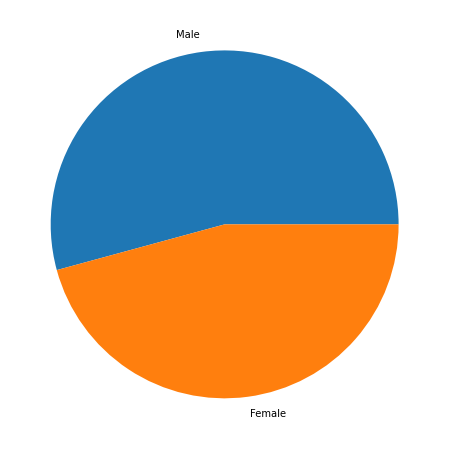

In [13]:
plt.figure(figsize=(8,8))
plt.pie(data['Gender'].value_counts(),labels=['Male','Female'])

C:\Users\allan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

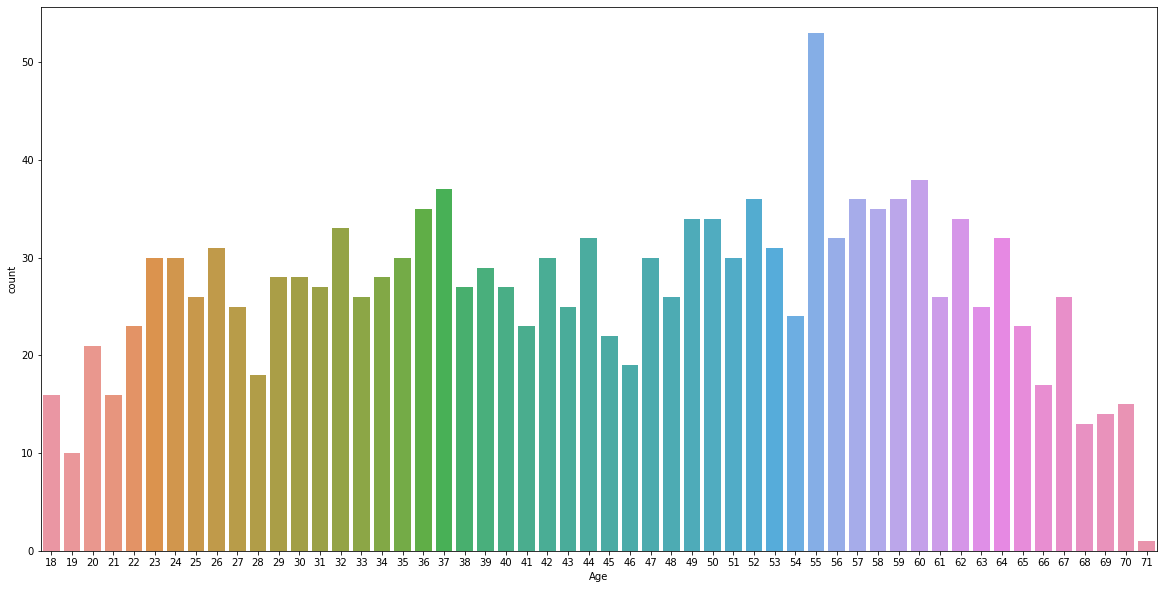

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)

In [18]:
data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [19]:
data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [20]:
data['healthy'].value_counts()

No     1164
Yes     289
Name: healthy, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

C:\Users\allan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\allan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\allan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\allan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

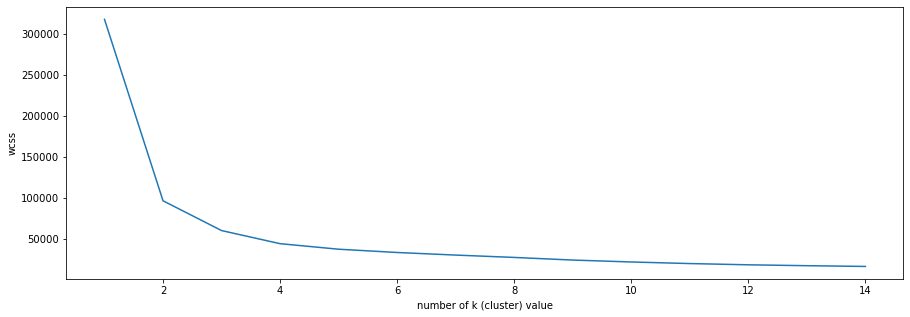

In [32]:
wcss = []
data_model = data.drop(['Gender'],axis=1)
for i in data_model.columns:
    le=LabelEncoder()
    data_model[i]=le.fit_transform(data_model[i])
data_model.head()    
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

C:\Users\allan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


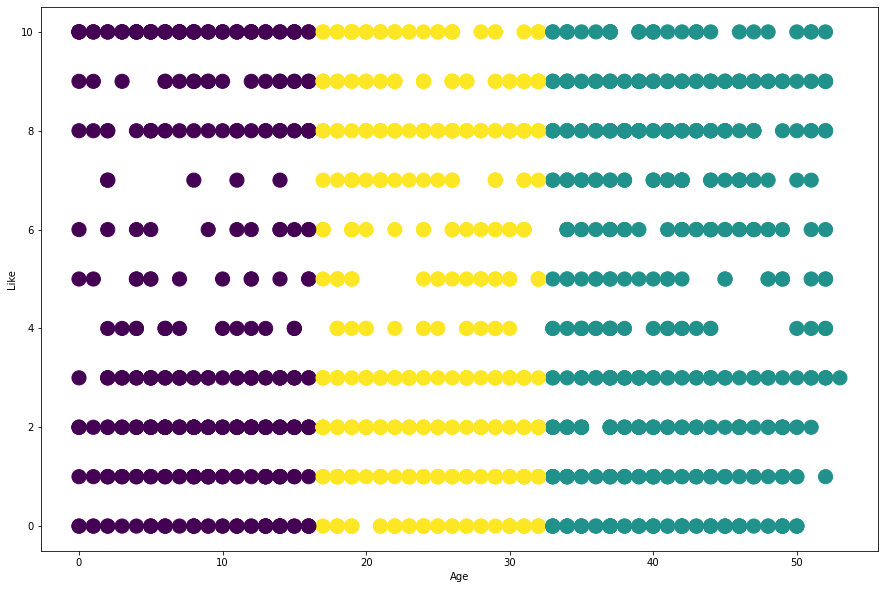

In [37]:
kmeans = KMeans(n_clusters=3)
data_predict = kmeans.fit_predict(data_model)



plt.figure(figsize=(15,10))

plt.scatter(x=data_model['Age'], y=data_model['Like'], c=data_predict, s=200, cmap='viridis')

plt.xlabel("Age")
plt.ylabel("Like")

plt.show()


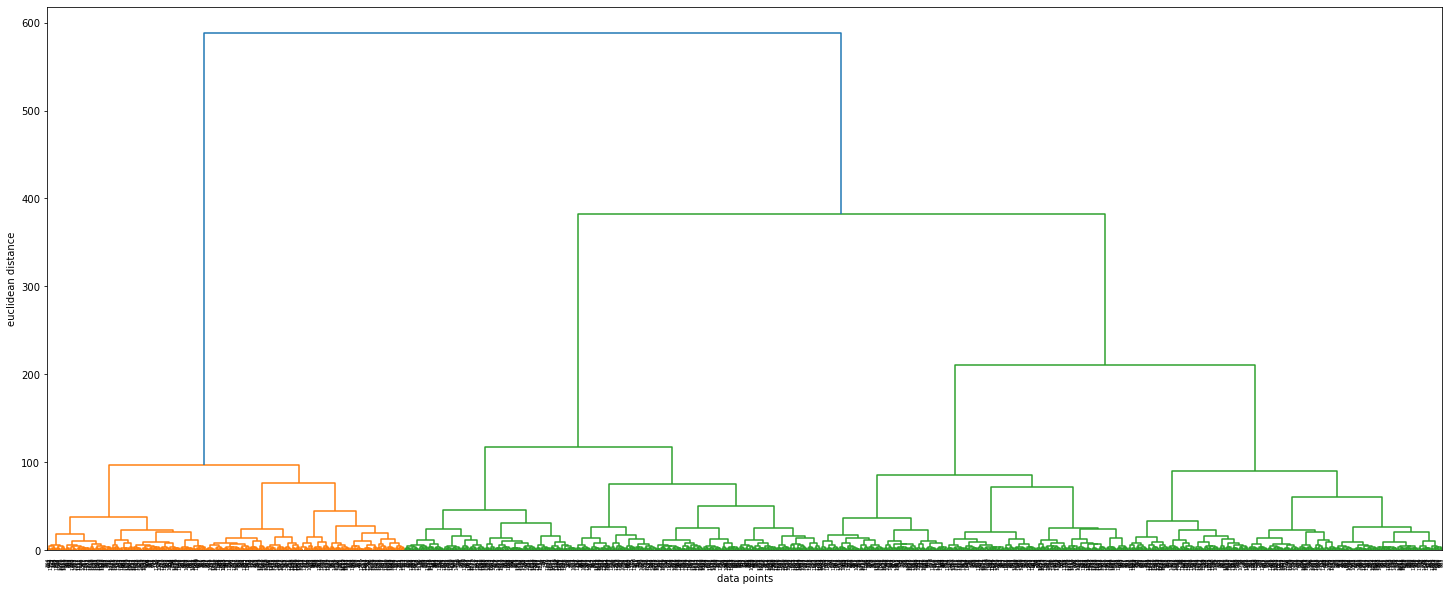

In [38]:
merg = linkage(data_model,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

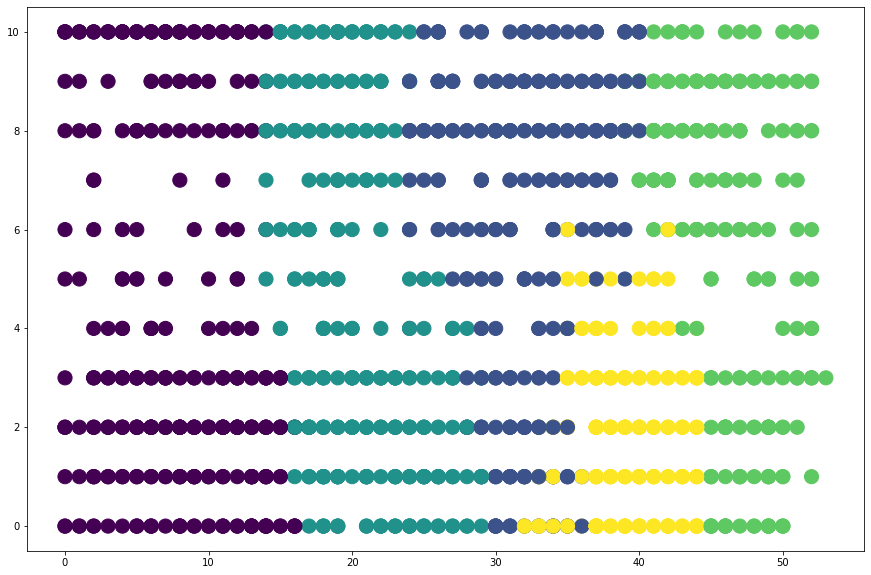

In [40]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(data_model)
plt.figure(figsize=(15,10))
plt.scatter(x=data_model['Age'], y=data_model['Like'], c=data_predict, s=200, cmap='viridis')
plt.show()

In [47]:
data.Like.value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [48]:
like_mapping = {
    'I love it!+5': 5,
    '+4': 4,
    '+3': 3,
    '+2': 2,
    '+1': 1,
    '0': 0,
    '-1': -1,
    '-2': -2,
    '-3': -3,
    '-4': -4,
    'I hate it!-5': -5
}

data['Like'] = data['Like'].map(like_mapping)


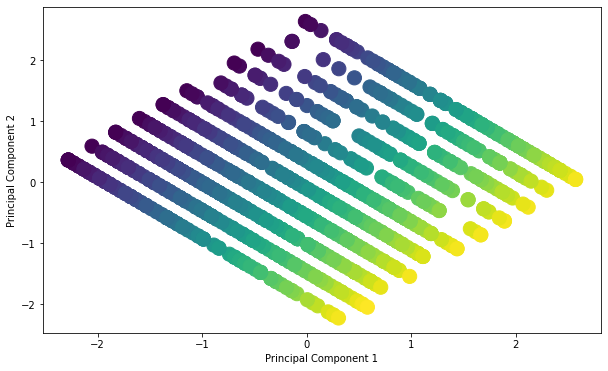

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset (assuming you have it in a DataFrame, replace 'your_dataset.csv' with your data)
# data = pd.read_csv('your_dataset.csv')

# Select the features you want to use for PCA (exclude non-numeric or non-relevant columns)
# In this example, I'm using 'Age', 'Like', and other relevant columns.
selected_features = data[['Age', 'Like']]

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Create a PCA model and specify the number of components (dimensions) you want
n_components = 2  # You can change this to the number of components you want
pca = PCA(n_components=n_components)

# Fit the PCA model to your scaled data
principalComponents = pca.fit_transform(scaled_data)

# Create a DataFrame to store the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Add the 'data_predict' column from your original dataset to color the points in the scatter plot
principalDf['data_predict'] = data['Age']  # Replace 'data_predict' with the actual column name

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x=principalDf['PC1'], y=principalDf['PC2'], c=principalDf['data_predict'], s=200, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
